In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import numpy as np
import pandas as pd

from math import sqrt

from pandas import read_csv, DataFrame
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA

from google.colab import drive
drive.mount('/content/drive')

<ipython-input-18-4d1b51e6180e>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
series = pd.read_csv("/content/drive/MyDrive/kmeans/daily-minimum-temperatures.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)

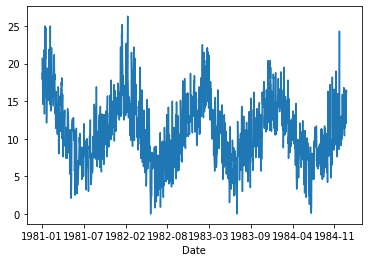

Date
1981-01    20.7
1981-01    17.9
1981-01    18.8
1981-01    14.6
1981-01    15.8
Name: Daily minimum temperatures, dtype: float64


In [ ]:
# convert first column to date.strftime("%Y-%m")
series.index = series.index.strftime("%Y-%m")

# filter the data by first column containing 1981, 1982, 1983 et 1984
series = series[series.index.str.contains("1981|1982|1983|1984")]

series.plot()
plt.show()
print(series.head())

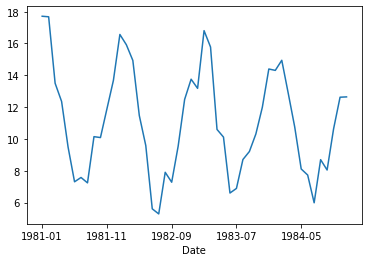

In [ ]:
series_averages = series.groupby(series.index).mean()

series_averages.plot()
plt.show()

In [ ]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.X = X
        self.m, self.n = X.shape

        # initialize centroids
        centroids = np.zeros((self.n_clusters, self.n))
        for i in range(self.n_clusters):
            # randomly pick a data point as centroid
            centroids[i] = X[np.random.choice(range(self.m))]

        # initialize clusters
        clusters = np.zeros(self.n_clusters)
        distances = np.zeros((self.m, self.n_clusters))

        # run the main k-means algorithm
        for _ in range(self.max_iter):
            # calculate distances
            for i in range(self.n_clusters):
                distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)

            # assign samples to closest clusters
            clusters = np.argmin(distances, axis=1)

            # update centroids
            for i in range(self.n_clusters):
                centroids[i] = np.mean(X[clusters == i], axis=0)

        self.centroids = centroids
        self.clusters = clusters

    def predict(self, X):
        m, n = X.shape
        distances = np.zeros((m, self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        clusters = np.argmin(distances, axis=1)
        return clusters

    # calculate inertia_
    def inertia_(self):
        self.inertia = 0
        for i in range(self.n_clusters):
            self.inertia += np.sum((self.X[self.clusters == i] - self.centroids[i]) ** 2)
        return self.inertia

In [ ]:
def elbow(x):
    inertias = []
    for k in range(1,10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_())
    plt.plot(range(1, 10), inertias)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertias')
    plt.show()

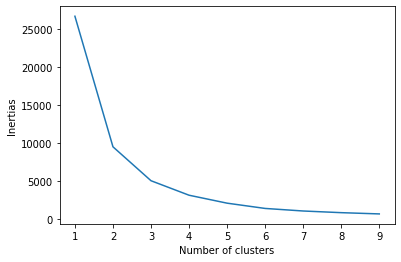

In [ ]:
# get optimal number of clusters
elbow(series.values.reshape(-1, 1))

In [ ]:
# run k-means and predict clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(series.values.reshape(-1, 1))

series = series.reset_index()
series['cluster'] = kmeans.clusters

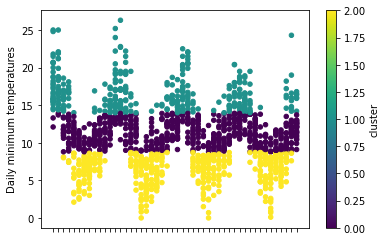

In [ ]:
# plot the clusters with the date
series.plot(x='Date', y='Daily minimum temperatures', kind='scatter',c='cluster', colormap='viridis')
plt.show()

In [ ]:
clusters = series.groupby('cluster')

p : ordre du modèle AR. Si p est égal à 3, alors le modèle considère que xt dépend de xt−1, xt−2 et xt−3.

d : est le nombre de fois qu’il faut différencier la série afin de la rendre stationnaire.

q : ordre du modèle MA.


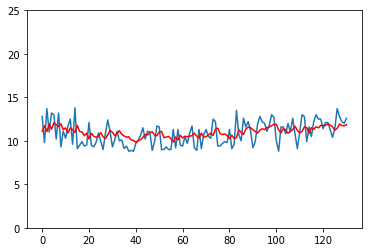

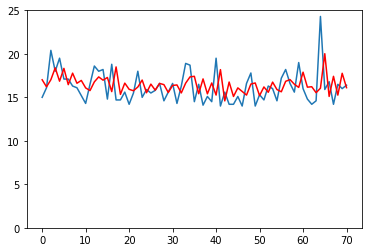

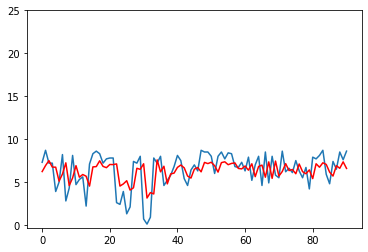

In [ ]:
for i in range(3):
  # split into train and test sets
  X = clusters.get_group(i)['Daily minimum temperatures'].to_numpy().reshape(-1,1)
  size = int(len(X) * 0.8)
  train, test = X[0:size], X[size:len(X)]
  training = [x for x in train]
  predictions = list()

  for t in range(len(test)):
      model = ARIMA(training, order=(5, 0, 0))
      model_fit = model.fit()
      output = model_fit.forecast()
      predictions.append(output[0])
      training.append(test[t])

  # plot forecasts against actual outcomes
  plt.plot(test)
  plt.plot(predictions, color='red')
  plt.yticks([0,5,10,15,20, 25 ])
  plt.show()